Epoch 1/100
27/27 [==============================] - 5s 34ms/step - loss: 2.0172e-04
Epoch 2/100
27/27 [==============================] - 1s 34ms/step - loss: 1.0992e-04
Epoch 3/100
27/27 [==============================] - 1s 34ms/step - loss: 9.5432e-05
Epoch 4/100
27/27 [==============================] - 1s 35ms/step - loss: 1.0192e-04
Epoch 5/100
27/27 [==============================] - 1s 33ms/step - loss: 8.5689e-05
Epoch 6/100
27/27 [==============================] - 1s 35ms/step - loss: 8.9980e-05
Epoch 7/100
27/27 [==============================] - 1s 38ms/step - loss: 8.6560e-05
Epoch 8/100
27/27 [==============================] - 1s 38ms/step - loss: 9.0478e-05
Epoch 9/100
27/27 [==============================] - 1s 38ms/step - loss: 8.3872e-05
Epoch 10/100
27/27 [==============================] - 1s 38ms/step - loss: 8.7538e-05
Epoch 11/100
27/27 [==============================] - 1s 38ms/step - loss: 8.2656e-05
Epoch 12/100
27/27 [==============================] - 1s 40ms/s

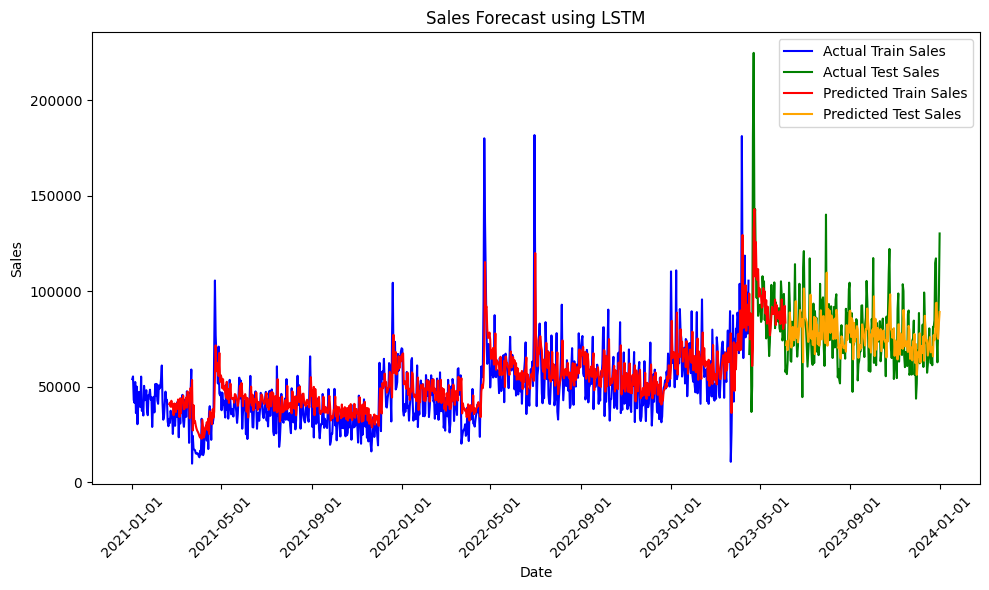

1/1 [==============================] - 0s 24ms/step
Predicted sales for the next 10 days:
Day 1: 105347.26
Day 2: 91560.28
Day 3: 90711.52
Day 4: 90633.46
Day 5: 90531.29
Day 6: 90308.75
Day 7: 90007.48
Day 8: 89665.42
Day 9: 89306.84
Day 10: 88945.85


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model
#load
df=pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv", index_col="Date" , parse_dates=True)

#extract
sales_data = df['Sales'].values.reshape(-1, 1)

#normalize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Function to prepare data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Setting time steps for LSTM
time_steps = 50  # Assuming each time step represents a day

# Prepare the data
X, y = prepare_data(scaled_data, time_steps)

# Reshape data for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Making predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Transforming predictions back to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plotting results
plt.figure(figsize=(10, 6))

# Plotting training data
plt.plot(df.index[:train_size], sales_data[:train_size], label='Actual Train Sales', color='blue')

# Plotting testing data
plt.plot(df.index[train_size:], sales_data[train_size:], label='Actual Test Sales', color='green')

# Plotting predictions (considering the possible time_steps adjustment)
plt.plot(df.index[time_steps:(train_size + time_steps)], train_predictions, label='Predicted Train Sales', color='red')
plt.plot(df.index[(train_size + time_steps):], test_predictions, label='Predicted Test Sales', color='orange')

plt.title('Sales Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Format x-axis labels as dates
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
model.save('lstm_sales_model.keras')

# Perform Z-score normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Function to prepare data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Setting time steps for LSTM
time_steps = 50  # Assuming each time step represents a day

# Prepare the data
X, y = prepare_data(scaled_data, time_steps)

# Load the trained LSTM model
model = load_model('lstm_sales_model.keras')

# Prepare the input data for prediction
X_future = X[-1].reshape(1, time_steps, 1)

# Define the number of days in the future to predict
num_days = 10  # Predict sales for the next month

# Initialize a list to store daily sales predictions
daily_sales_predictions = []

# Predict daily sales for the next month
for _ in range(num_days):
    # Predict sales for the next day using the loaded model
    future_prediction_scaled = model.predict(X_future)[0][0]
    
    # Inverse transform the predicted sales data to the original scale
    future_prediction = scaler.inverse_transform([[future_prediction_scaled]])[0][0]
    
    # Append the predicted sales to the list
    daily_sales_predictions.append(future_prediction)
    
    # Shift the input data by one day to include the new prediction
    X_future = np.roll(X_future, -1, axis=1)
    X_future[0, -1, 0] = future_prediction_scaled

# Print the predicted sales for the next month
print("Predicted sales for the next {} days:".format(num_days))
for day, prediction in enumerate(daily_sales_predictions, start=1):
    print("Day {}: {:.2f}".format(day, prediction))


Epoch 1/100
27/27 [==============================] - 4s 33ms/step - loss: 2.5099e-04
Epoch 2/100
27/27 [==============================] - 1s 32ms/step - loss: 1.3935e-04
Epoch 3/100
27/27 [==============================] - 1s 32ms/step - loss: 1.0433e-04
Epoch 4/100
27/27 [==============================] - 1s 33ms/step - loss: 9.0320e-05
Epoch 5/100
27/27 [==============================] - 1s 32ms/step - loss: 8.5284e-05
Epoch 6/100
27/27 [==============================] - 1s 32ms/step - loss: 8.8401e-05
Epoch 7/100
27/27 [==============================] - 1s 32ms/step - loss: 8.6868e-05
Epoch 8/100
27/27 [==============================] - 1s 33ms/step - loss: 8.7094e-05
Epoch 9/100
27/27 [==============================] - 1s 34ms/step - loss: 8.6632e-05
Epoch 10/100
27/27 [==============================] - 1s 32ms/step - loss: 9.0833e-05
Epoch 11/100
27/27 [==============================] - 1s 33ms/step - loss: 8.5022e-05
Epoch 12/100
27/27 [==============================] - 1s 33ms/s

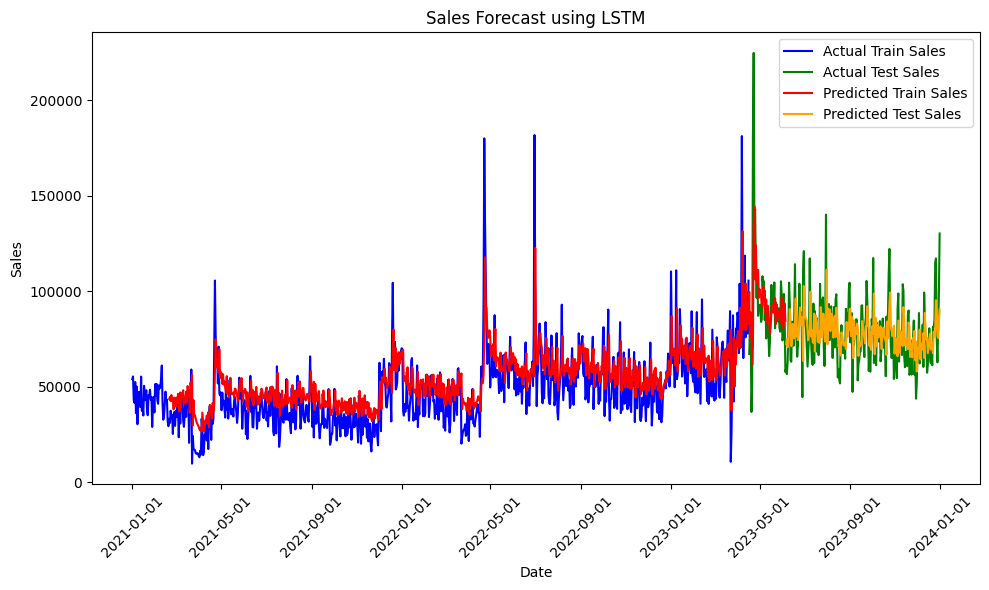

Enter the start date (YYYY-MM-DD):  2024-05-01
Enter the end date (YYYY-MM-DD):  2024-05-31


KeyError: Timestamp('2024-05-01 00:00:00')

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model

# Load the dataset
df = pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv", index_col="Date", parse_dates=True)

# Extract sales data
sales_data = df['Sales'].values.reshape(-1, 1)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Function to prepare data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Setting time steps for LSTM
time_steps = 50  # Assuming each time step represents a day

# Prepare the data
X, y = prepare_data(scaled_data, time_steps)

# Reshape data for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Making predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Transforming predictions back to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plotting results
plt.figure(figsize=(10, 6))

# Plotting training data
plt.plot(df.index[:train_size], sales_data[:train_size], label='Actual Train Sales', color='blue')

# Plotting testing data
plt.plot(df.index[train_size:], sales_data[train_size:], label='Actual Test Sales', color='green')

# Plotting predictions (considering the possible time_steps adjustment)
plt.plot(df.index[time_steps:(train_size + time_steps)], train_predictions, label='Predicted Train Sales', color='red')
plt.plot(df.index[(train_size + time_steps):], test_predictions, label='Predicted Test Sales', color='orange')

plt.title('Sales Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Format x-axis labels as dates
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
model.save('lstm_sales_model.keras')

# Perform Z-score normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Load the trained LSTM model
model = load_model('lstm_sales_model.keras')

# Input start date and end date
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")

# Convert start and end dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Extract data for prediction period
prediction_data = df.loc[start_date:end_date]['Sales'].values.reshape(-1, 1)
scaled_prediction_data = scaler.transform(prediction_data)

# Prepare the input data for prediction
X_future = scaled_prediction_data[-time_steps:].reshape(1, time_steps, 1)

# Predict sales for the specified period
predictions = []

for _ in range(len(prediction_data)):
    future_prediction_scaled = model.predict(X_future)[0][0]
    future_prediction = scaler.inverse_transform([[future_prediction_scaled]])[0][0]
    predictions.append(future_prediction)
    X_future = np.roll(X_future, -1, axis=1)
    X_future[0, -1, 0] = future_prediction_scaled

# Plotting predicted sales for the specified period
plt.figure(figsize=(10, 6))
plt.plot(df.loc[start_date:end_date].index, prediction_data, label='Actual Sales', color='blue')
plt.plot(df.loc[start_date:end_date].index, predictions, label='Predicted Sales', color='red')
plt.title('Sales Forecast for Specified Period')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Format x-axis labels as dates
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

# Print the predicted sales for the specified period
print("Predicted sales from {} to {}:".format(start_date.date(), end_date.date()))
for day, prediction in enumerate(predictions, start=1):
    print("Day {}: {:.2f}".format(day, prediction))


Epoch 1/100
27/27 [==============================] - 4s 35ms/step - loss: 2.4123e-04
Epoch 2/100
27/27 [==============================] - 1s 35ms/step - loss: 1.3134e-04
Epoch 3/100
27/27 [==============================] - 1s 35ms/step - loss: 1.0557e-04
Epoch 4/100
27/27 [==============================] - 1s 35ms/step - loss: 8.9995e-05
Epoch 5/100
27/27 [==============================] - 1s 35ms/step - loss: 9.2694e-05
Epoch 6/100
27/27 [==============================] - 1s 35ms/step - loss: 1.0230e-04
Epoch 7/100
27/27 [==============================] - 1s 36ms/step - loss: 9.1165e-05
Epoch 8/100
27/27 [==============================] - 1s 36ms/step - loss: 9.5592e-05
Epoch 9/100
27/27 [==============================] - 1s 35ms/step - loss: 8.6460e-05
Epoch 10/100
27/27 [==============================] - 1s 36ms/step - loss: 8.7710e-05
Epoch 11/100
27/27 [==============================] - 1s 34ms/step - loss: 8.4273e-05
Epoch 12/100
27/27 [==============================] - 1s 35ms/s

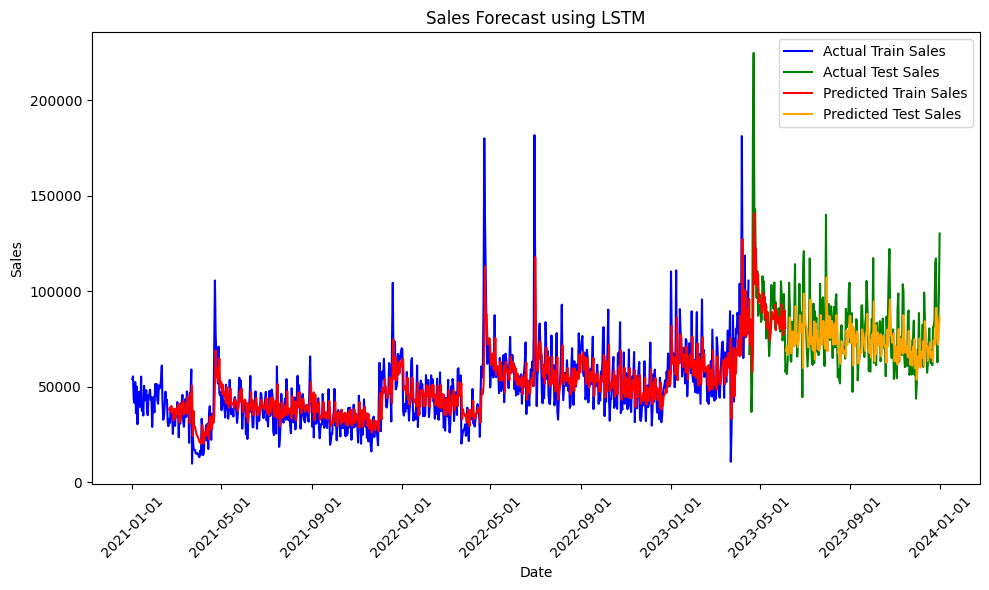

KeyboardInterrupt: Interrupted by user

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model

# Load the dataset
df = pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv", index_col="Date", parse_dates=True)

# Extract sales data
sales_data = df['Sales'].values.reshape(-1, 1)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Function to prepare data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Setting time steps for LSTM
time_steps = 50  # Assuming each time step represents a day

# Prepare the data
X, y = prepare_data(scaled_data, time_steps)

# Reshape data for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Making predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Transforming predictions back to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plotting results
plt.figure(figsize=(10, 6))

# Plotting training data
plt.plot(df.index[:train_size], sales_data[:train_size], label='Actual Train Sales', color='blue')

# Plotting testing data
plt.plot(df.index[train_size:], sales_data[train_size:], label='Actual Test Sales', color='green')

# Plotting predictions (considering the possible time_steps adjustment)
plt.plot(df.index[time_steps:(train_size + time_steps)], train_predictions, label='Predicted Train Sales', color='red')
plt.plot(df.index[(train_size + time_steps):], test_predictions, label='Predicted Test Sales', color='orange')

plt.title('Sales Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Format x-axis labels as dates
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
model.save('lstm_sales_model.keras')

# Perform Z-score normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Load the trained LSTM model
model = load_model('lstm_sales_model.keras')

# Input start date and end date
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")

# Convert start and end dates to datetime objects
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Check if the specified start date and end date are within the range of available dates
if start_date not in df.index or end_date not in df.index:
    print("Error: Specified start date or end date is not within the range of available dates.")
else:
    # Extract data for prediction period
    prediction_data = df.loc[start_date:end_date]['Sales'].values.reshape(-1, 1)
    scaled_prediction_data = scaler.transform(prediction_data)

    # Prepare the input data for prediction
    X_future = scaled_prediction_data[-time_steps:].reshape(1, time_steps, 1)

    # Predict sales for the specified period
    predictions = []

    for _ in range(len(prediction_data)):
        future_prediction_scaled = model.predict(X_future)[0][0]
        future_prediction = scaler.inverse_transform([[future_prediction_scaled]])[0][0]
        predictions.append(future_prediction)
        X_future = np.roll(X_future, -1, axis=1)
        X_future[0, -1, 0] = future_prediction_scaled

    # Plotting predicted sales for the specified period
    plt.figure(figsize=(10, 6))
    plt.plot(df.loc[start_date:end_date].index, prediction_data, label='Actual Sales', color='blue')
    plt.plot(df.loc[start_date:end_date].index, predictions, label='Predicted Sales', color='red')
    plt.title('Sales Forecast for Specified Period')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Format x-axis labels as dates
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()

    # Print the predicted sales for the specified period
    print("Predicted sales from {} to {}:".format(start_date.date(), end_date.date()))
    for day, prediction in enumerate(predictions, start=1):
        print("Day {}: {:.2f}".format(day, prediction))


Epoch 1/100
27/27 [==============================] - 4s 35ms/step - loss: 2.4781e-04
Epoch 2/100
27/27 [==============================] - 1s 35ms/step - loss: 1.1865e-04
Epoch 3/100
27/27 [==============================] - 1s 34ms/step - loss: 9.4220e-05
Epoch 4/100
27/27 [==============================] - 1s 35ms/step - loss: 8.6061e-05
Epoch 5/100
27/27 [==============================] - 1s 34ms/step - loss: 8.9539e-05
Epoch 6/100
27/27 [==============================] - 1s 34ms/step - loss: 8.8382e-05
Epoch 7/100
27/27 [==============================] - 1s 35ms/step - loss: 8.7925e-05
Epoch 8/100
27/27 [==============================] - 1s 35ms/step - loss: 8.4039e-05
Epoch 9/100
27/27 [==============================] - 1s 34ms/step - loss: 8.7555e-05
Epoch 10/100
27/27 [==============================] - 1s 35ms/step - loss: 8.9779e-05
Epoch 11/100
27/27 [==============================] - 1s 35ms/step - loss: 8.3934e-05
Epoch 12/100
27/27 [==============================] - 1s 34ms/s

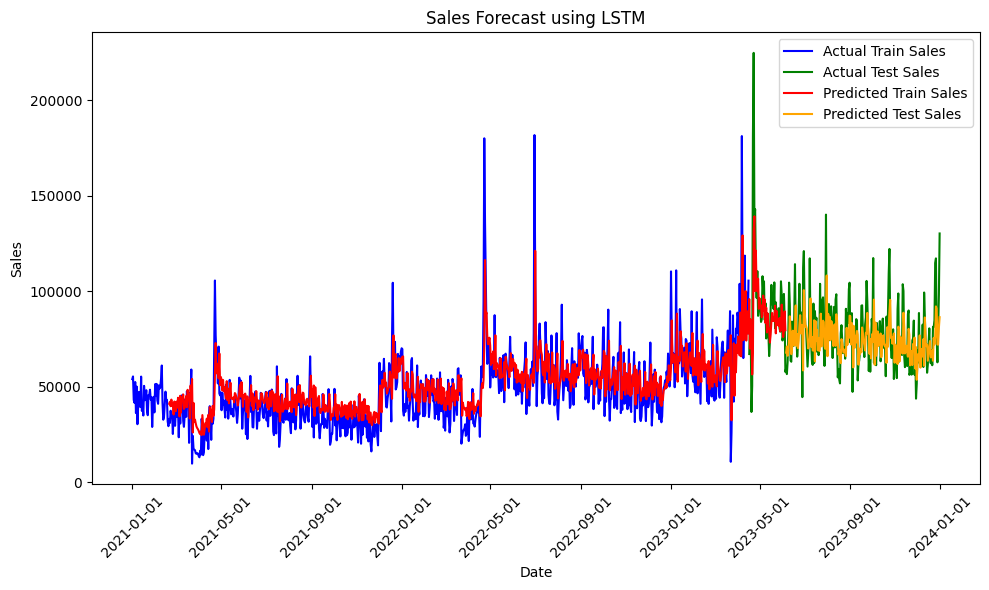

Enter the start date (YYYY-DD-MM):  2024-01-05
Enter the end date (YYYY-DD-MM):  2024-31-05


Error: Specified start date or end date is not within the range of available dates.


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model

# Load the dataset
df = pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv", index_col="Date", parse_dates=True)

# Extract sales data
sales_data = df['Sales'].values.reshape(-1, 1)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Function to prepare data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Setting time steps for LSTM
time_steps = 50  # Assuming each time step represents a day

# Prepare the data
X, y = prepare_data(scaled_data, time_steps)

# Reshape data for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Making predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Transforming predictions back to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plotting results
plt.figure(figsize=(10, 6))

# Plotting training data
plt.plot(df.index[:train_size], sales_data[:train_size], label='Actual Train Sales', color='blue')

# Plotting testing data
plt.plot(df.index[train_size:], sales_data[train_size:], label='Actual Test Sales', color='green')

# Plotting predictions (considering the possible time_steps adjustment)
plt.plot(df.index[time_steps:(train_size + time_steps)], train_predictions, label='Predicted Train Sales', color='red')
plt.plot(df.index[(train_size + time_steps):], test_predictions, label='Predicted Test Sales', color='orange')

plt.title('Sales Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Format x-axis labels as dates
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
model.save('lstm_sales_model.keras')

# Perform Z-score normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Load the trained LSTM model
model = load_model('lstm_sales_model.keras')

# Input start date and end date
start_date = input("Enter the start date (YYYY-DD-MM): ")
end_date = input("Enter the end date (YYYY-DD-MM): ")

# Convert start and end dates to datetime objects
start_date = pd.to_datetime(start_date, format='%Y-%d-%m')
end_date = pd.to_datetime(end_date, format='%Y-%d-%m')

# Check if the specified start date and end date are within the range of available dates
if start_date not in df.index or end_date not in df.index:
    print("Error: Specified start date or end date is not within the range of available dates.")
else:
    # Extract data for prediction period
    prediction_data = df.loc[start_date:end_date]['Sales'].values.reshape(-1, 1)
    scaled_prediction_data = scaler.transform(prediction_data)

    # Prepare the input data for prediction
    X_future = scaled_prediction_data[-time_steps:].reshape(1, time_steps, 1)

    # Predict sales for the specified period
    predictions = []

    for _ in range(len(prediction_data)):
        future_prediction_scaled = model.predict(X_future)[0][0]
        future_prediction = scaler.inverse_transform([[future_prediction_scaled]])[0][0]
        predictions.append(future_prediction)
        X_future = np.roll(X_future, -1, axis=1)
        X_future[0, -1, 0] = future_prediction_scaled

    # Plotting predicted sales for the specified period
    plt.figure(figsize=(10, 6))
    plt.plot(df.loc[start_date:end_date].index, prediction_data, label='Actual Sales', color='blue')
    plt.plot(df.loc[start_date:end_date].index, predictions, label='Predicted Sales', color='red')
    plt.title('Sales Forecast for Specified Period')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Format x-axis labels as dates
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()

    # Print the predicted sales for the specified period
    print("Predicted sales from {} to {}:".format(start_date.date(), end_date.date()))
    for day, prediction in enumerate(predictions, start=1):
        print("Day {}: {:.2f}".format(day, prediction))


In [7]:
# Display the range of available dates in the dataset
print("Range of available dates:")
print("Start Date:", df.index.min().date())
print("End Date:", df.index.max().date())


Range of available dates:
Start Date: 2021-01-01
End Date: 2023-12-31


Epoch 1/100
27/27 [==============================] - 4s 24ms/step - loss: 2.1787e-04
Epoch 2/100
27/27 [==============================] - 1s 23ms/step - loss: 1.1539e-04
Epoch 3/100
27/27 [==============================] - 1s 24ms/step - loss: 9.9967e-05
Epoch 4/100
27/27 [==============================] - 1s 22ms/step - loss: 9.7278e-05
Epoch 5/100
27/27 [==============================] - 1s 23ms/step - loss: 9.7092e-05
Epoch 6/100
27/27 [==============================] - 1s 23ms/step - loss: 8.6754e-05
Epoch 7/100
27/27 [==============================] - 1s 23ms/step - loss: 8.6226e-05
Epoch 8/100
27/27 [==============================] - 1s 23ms/step - loss: 8.7581e-05
Epoch 9/100
27/27 [==============================] - 1s 23ms/step - loss: 8.5079e-05
Epoch 10/100
27/27 [==============================] - 1s 23ms/step - loss: 8.3031e-05
Epoch 11/100
27/27 [==============================] - 1s 23ms/step - loss: 8.5158e-05
Epoch 12/100
27/27 [==============================] - 1s 23ms/s

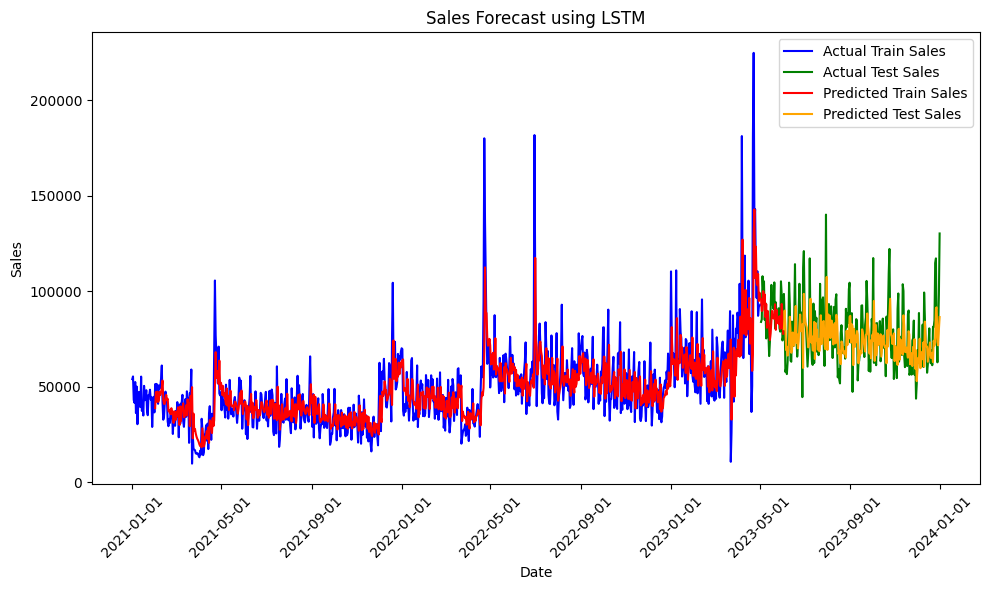

TypeError: Cannot convert input [30 days 00:00:00] of type <class 'pandas._libs.tslibs.timedeltas.Timedelta'> to Timestamp

In [12]:
import numpy as np
import pandas as pd
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model

# Load the dataset
df = pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv", index_col="Date", parse_dates=True)

# Extract sales data
sales_data = df['Sales'].values.reshape(-1, 1)

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Function to prepare data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Setting time steps for LSTM
time_steps = 31  # Assuming each time step represents a day

# Prepare the data
X, y = prepare_data(scaled_data, time_steps)

# Reshape data for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Making predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Transforming predictions back to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plotting results
plt.figure(figsize=(10, 6))

# Plotting training data
plt.plot(df.index[:train_size], sales_data[:train_size], label='Actual Train Sales', color='blue')

# Plotting testing data
plt.plot(df.index[train_size:], sales_data[train_size:], label='Actual Test Sales', color='green')

# Plotting predictions (considering the possible time_steps adjustment)
plt.plot(df.index[time_steps:(train_size + time_steps)], train_predictions, label='Predicted Train Sales', color='red')
plt.plot(df.index[(train_size + time_steps):], test_predictions, label='Predicted Test Sales', color='orange')

plt.title('Sales Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Format x-axis labels as dates
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
model.save('lstm_sales_model.keras')

# Perform Z-score normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Load the trained LSTM model
model = load_model('lstm_sales_model.keras')

# Specify future start and end dates for prediction
future_start_date = pd.to_datetime('2024-05-01')  # Example future start date
future_end_date = pd.to_datetime('2024-05-31')    # Example future end date

# Check if the specified future start date and end date are beyond the range of available dates
if future_start_date < df.index[-1] or future_end_date < df.index[-1]:
    print("Error: Specified future start date or end date is not beyond the range of available dates.")
else:
    # Extract data for the prediction period
    prediction_start_date = df.index[-1] + pd.Timedelta(days=1)
    prediction_end_date = future_end_date - future_start_date
    prediction_period = pd.date_range(start=prediction_start_date, end=prediction_end_date)
    prediction_data = df.loc[prediction_period]['Sales'].values.reshape(-1, 1)
    scaled_prediction_data = scaler.transform(prediction_data)

    # Prepare the input data for prediction
    X_future = scaled_prediction_data[-time_steps:].reshape(1, time_steps, 1)

    # Predict sales for the specified period
    predictions = []

    for _ in range(len(prediction_data)):
        future_prediction_scaled = model.predict(X_future)[0][0]
        future_prediction = scaler.inverse_transform([[future_prediction_scaled]])[0][0]
        predictions.append(future_prediction)
        X_future = np.roll(X_future, -1, axis=1)
        X_future[0, -1, 0] = future_prediction_scaled

    # Plotting predicted sales for the specified period
    plt.figure(figsize=(10, 6))
    plt.plot(prediction_period, prediction_data, label='Actual Sales', color='blue')
    plt.plot(prediction_period, predictions, label='Predicted Sales', color='red')
    plt.title('Sales Forecast for Specified Future Period')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Format x-axis labels as dates
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping labels
    plt.show()

    # Print the predicted sales for the specified period
    print("Predicted sales from {} to {}:".format(prediction_period[0].date(), prediction_period[-1].date()))
    for day, prediction in enumerate(predictions, start=1):
        print("Day {}: {:.2f}".format(day, prediction))


In [ ]:
#06/05/2024

In [ ]:
#claude lstm model

Epoch 1/300
13/13 [==============================] - 12s 281ms/step - loss: 4.1417e-04 - val_loss: 0.5274
Epoch 2/300
13/13 [==============================] - 1s 102ms/step - loss: 2.0222e-04 - val_loss: 0.5276
Epoch 3/300
13/13 [==============================] - 1s 104ms/step - loss: 1.7000e-04 - val_loss: 0.5275
Epoch 4/300
13/13 [==============================] - 1s 104ms/step - loss: 1.5408e-04 - val_loss: 0.5274
Epoch 5/300
13/13 [==============================] - 1s 102ms/step - loss: 1.4031e-04 - val_loss: 0.5273
Epoch 6/300
13/13 [==============================] - 1s 102ms/step - loss: 1.2678e-04 - val_loss: 0.5272
Epoch 7/300
13/13 [==============================] - 1s 104ms/step - loss: 1.2442e-04 - val_loss: 0.5272
Epoch 8/300
13/13 [==============================] - 1s 105ms/step - loss: 1.1936e-04 - val_loss: 0.5271
Epoch 9/300
13/13 [==============================] - 1s 102ms/step - loss: 1.1938e-04 - val_loss: 0.5272
Epoch 10/300
13/13 [==============================] - 

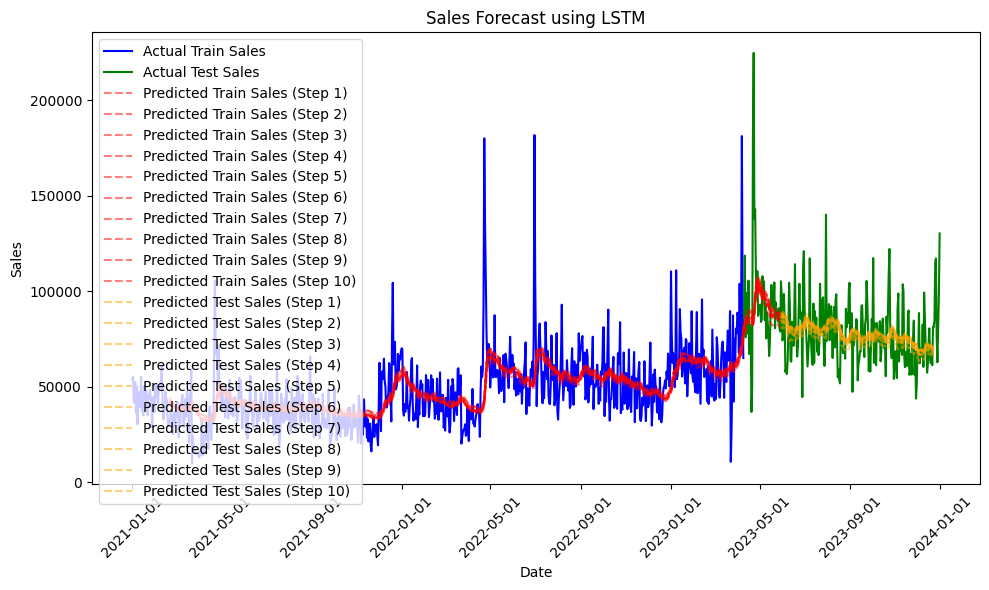

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#load
df=pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv", index_col="Date" , parse_dates=True)

#extract
sales_data = df['Sales'].values.reshape(-1, 1)

#normalize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Function to prepare data for LSTM
def prepare_data(data, time_steps, lookback):
    X, y = [], []
    for i in range(len(data) - time_steps - lookback + 1):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps:i + time_steps + lookback, 0])
    return np.array(X), np.array(y)

# Setting time steps and lookback for LSTM
time_steps = 50  # Assuming each time step represents a day
lookback = 10  # Number of future time steps to predict

# Prepare the data
X, y = prepare_data(scaled_data, time_steps, lookback)

# Reshape data for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Building the LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dropout(0.2))
model.add(Dense(units=lookback))

optimizer = Adam(learning_rate=0.0005)  # Set a lower learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Training the model
model.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop])

# Making predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Transforming predictions back to original scale
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, lookback)).reshape(-1)
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, lookback)).reshape(-1)

# Calculate evaluation metrics
train_mse, train_mae, train_r2 = [], [], []
test_mse, test_mae, test_r2 = [], [], []

# For each lookback step
for i in range(lookback):
    start_idx_train = i
    end_idx_train = train_size + i
    start_idx_test = train_size + i
    end_idx_test = len(sales_data) - lookback + i + 1

    # Training set metrics
    train_mse.append(mean_squared_error(sales_data[start_idx_train:end_idx_train], train_predictions[start_idx_train:end_idx_train]))
    train_mae.append(mean_absolute_error(sales_data[start_idx_train:end_idx_train], train_predictions[start_idx_train:end_idx_train]))
    train_r2.append(r2_score(sales_data[start_idx_train:end_idx_train], train_predictions[start_idx_train:end_idx_train]))

    # Test set metrics
    test_mse.append(mean_squared_error(sales_data[start_idx_test:end_idx_test], test_predictions[start_idx_test:end_idx_test]))
    test_mae.append(mean_absolute_error(sales_data[start_idx_test:end_idx_test], test_predictions[start_idx_test:end_idx_test]))
    test_r2.append(r2_score(sales_data[start_idx_test:end_idx_test], test_predictions[start_idx_test:end_idx_test]))

# Calculate mean of metrics across lookback steps
train_mse = np.mean(train_mse)
train_rmse = np.sqrt(train_mse)
train_mae = np.mean(train_mae)
train_r2 = np.mean(train_r2)

test_mse = np.mean(test_mse)
test_rmse = np.sqrt(test_mse)
test_mae = np.mean(test_mae)
test_r2 = np.mean(test_r2)

# Print evaluation metrics
print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"R-squared (R²): {train_r2:.2f}")

print("\nTest Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"R-squared (R²): {test_r2:.2f}")

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(df.index[:train_size], sales_data[:train_size], label='Actual Train Sales', color='blue')
plt.plot(df.index[train_size:], sales_data[train_size:], label='Actual Test Sales', color='green')

# Plot train predictions
train_pred_dates = df.index[time_steps:(train_size + time_steps)]
for i in range(lookback):
    plt.plot(train_pred_dates, train_predictions[i::lookback], label=f'Predicted Train Sales (Step {i+1})', color='red', linestyle='--', alpha=0.5)

# Plot test predictions
test_pred_dates = df.index[(train_size + time_steps):]
for i in range(lookback):
    test_pred = test_predictions[i::lookback]
    valid_idx = np.arange(len(test_pred_dates))[:len(test_pred)]
    plt.plot(test_pred_dates[valid_idx], test_pred, label=f'Predicted Test Sales (Step {i+1})', color='orange', linestyle='--', alpha=0.5)

plt.title('Sales Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

model.save('lstm_sales_model.keras')

In [ ]:
# another lstm model - chatgpt
 

In [ ]:
# future sales prediction using lstm model

Enter the start date for prediction (YYYY-MM-DD):  2024-05-01
Enter the end date for prediction (YYYY-MM-DD):  2024-07-01


1/1 [==============================] - 0s 21ms/step


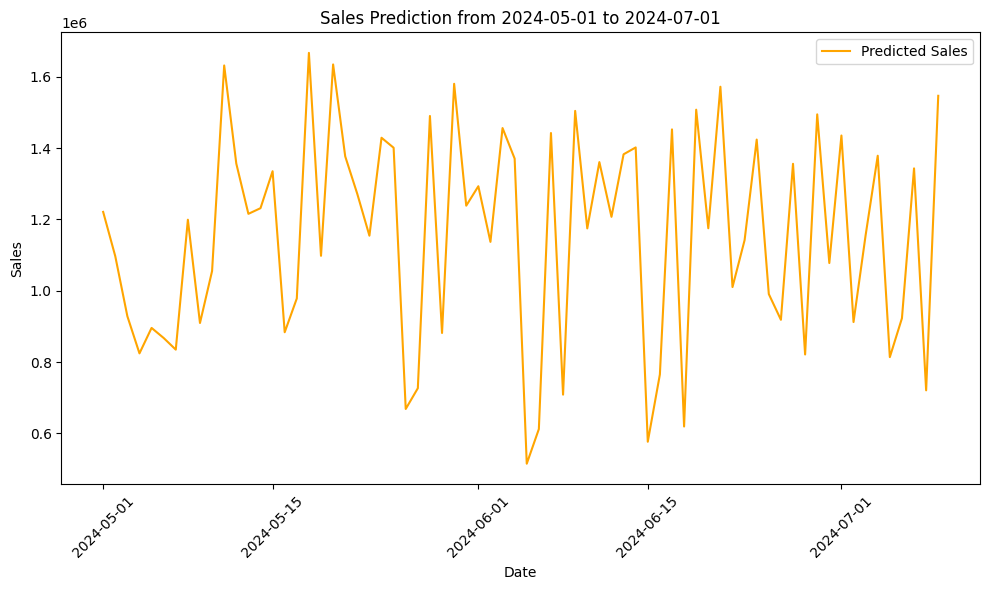


Predicted Sales from 2024-05-01 to 2024-07-01:
2024-05-01: 1221274.62
2024-05-02: 1097145.00
2024-05-03: 928770.56
2024-05-04: 824572.94
2024-05-05: 895955.81
2024-05-06: 867694.81
2024-05-07: 835037.94
2024-05-08: 1199366.38
2024-05-09: 909695.06
2024-05-10: 1055484.00
2024-05-11: 1631951.12
2024-05-12: 1356913.00
2024-05-13: 1215836.25
2024-05-14: 1231700.50
2024-05-15: 1335401.75
2024-05-16: 883785.44
2024-05-17: 978535.62
2024-05-18: 1667232.00
2024-05-19: 1098154.75
2024-05-20: 1634800.12
2024-05-21: 1377045.00
2024-05-22: 1271559.75
2024-05-23: 1154548.25
2024-05-24: 1429210.25
2024-05-25: 1401199.75
2024-05-26: 668656.50
2024-05-27: 726809.81
2024-05-28: 1490292.75
2024-05-29: 881733.44
2024-05-30: 1580553.62
2024-05-31: 1238744.00
2024-06-01: 1293272.25
2024-06-02: 1137283.88
2024-06-03: 1456422.12
2024-06-04: 1370700.62
2024-06-05: 515146.72
2024-06-06: 612255.88
2024-06-07: 1442476.88
2024-06-08: 708825.06
2024-06-09: 1504546.38
2024-06-10: 1175032.12
2024-06-11: 1360944.50


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from datetime import datetime, timedelta

# Load the saved LSTM model
model = load_model('lstm_sales_model.keras')

# Load and prepare the data
df = pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv", index_col="Date", parse_dates=True)
sales_data = df['Sales'].values.reshape(-1, 1)

# Initialize the scaler and fit with the existing data
scaler = StandardScaler()
scaler.fit(sales_data)

# Ask the user for the start and end dates for prediction
start_date_str = input("Enter the start date for prediction (YYYY-MM-DD): ")
end_date_str = input("Enter the end date for prediction (YYYY-MM-DD): ")

# Convert input strings to datetime objects
try:
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
except ValueError:
    print("Invalid date format. Please ensure you enter dates in the format YYYY-MM-DD.")
    exit()

# Calculate the number of days to predict
num_days_to_predict = (end_date - start_date).days + 1

# Ensure prediction date range starts after the last date in the data
last_date = df.index[-1]
if start_date <= last_date:
    print("Prediction start date must be after the last date in the data.")
    exit()

# Calculate how many lookback periods will be needed
num_lookback = num_days_to_predict // lookback + 1

# Start from the last `time_steps` days of the data
current_input_data = df.loc[last_date - timedelta(days=time_steps - 1):last_date]['Sales'].values.reshape(-1, 1)

# Normalize the input data
current_input_data = scaler.transform(current_input_data)

# Check and adjust size if `current_input_data` is smaller than required
if len(current_input_data) < time_steps:
    # Padding with zeros
    padding_needed = time_steps - len(current_input_data)
    current_input_data = np.pad(current_input_data, ((padding_needed, 0), (0, 0)), mode='constant')

# Prepare the input data for prediction
predictions = []
for _ in range(num_lookback):
    # Reshape the input data for the LSTM model
    current_input_data_reshaped = current_input_data.reshape(1, time_steps, 1)
    
    # Predict the next lookback days
    predicted_next_lookback = model.predict(current_input_data_reshaped)
    
    # Inverse transform the predictions back to their original scale
    predicted_next_lookback = scaler.inverse_transform(predicted_next_lookback)
    
    # Append the predictions to the list
    predictions.append(predicted_next_lookback.flatten())
    
    # Update the current input data with the new predictions for the next iteration
    current_input_data = np.concatenate([current_input_data[lookback:], predicted_next_lookback.reshape(-1, 1)], axis=0)

# Concatenate the predictions and create a date range for the forecasted data
predictions = np.concatenate(predictions)

# Adjust `num_days_to_predict` to the length of `predictions` if necessary
if len(predictions) != num_days_to_predict:
    num_days_to_predict = len(predictions)

# Calculate the date range for predictions
prediction_dates = pd.date_range(start=start_date, periods=num_days_to_predict)

# Plot the predicted sales
plt.figure(figsize=(10, 6))
plt.plot(prediction_dates, predictions, label='Predicted Sales', color='orange')

# Add title and labels
plt.title(f'Sales Prediction from {start_date.date()} to {end_date.date()}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Format the date labels on the x-axis
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Print the predicted sales values
print(f"\nPredicted Sales from {start_date.date()} to {end_date.date()}:")
for date, pred_sale in zip(prediction_dates, predictions):
    print(f"{date.date()}: {pred_sale:.2f}")


Epoch 1/100
26/26 [==============================] - 10s 143ms/step - loss: 4.1424e-04 - val_loss: 0.5273
Epoch 2/100
26/26 [==============================] - 2s 72ms/step - loss: 1.8314e-04 - val_loss: 0.5275
Epoch 3/100
26/26 [==============================] - 2s 72ms/step - loss: 1.6616e-04 - val_loss: 0.5275
Epoch 4/100
26/26 [==============================] - 2s 81ms/step - loss: 1.4605e-04 - val_loss: 0.5275
Epoch 5/100
26/26 [==============================] - 2s 80ms/step - loss: 1.3733e-04 - val_loss: 0.5274
Epoch 6/100
7/7 [==============================] - 0s 24ms/step

Training Set Metrics:
Mean Squared Error (MSE): 371000536.38
Root Mean Squared Error (RMSE): 19261.37
Mean Absolute Error (MAE): 13871.49
R-squared (R²): 0.29

Test Set Metrics:
Mean Squared Error (MSE): 1780789905455.55
Root Mean Squared Error (RMSE): 1334462.40
Mean Absolute Error (MAE): 42548.47
R-squared (R²): -0.00


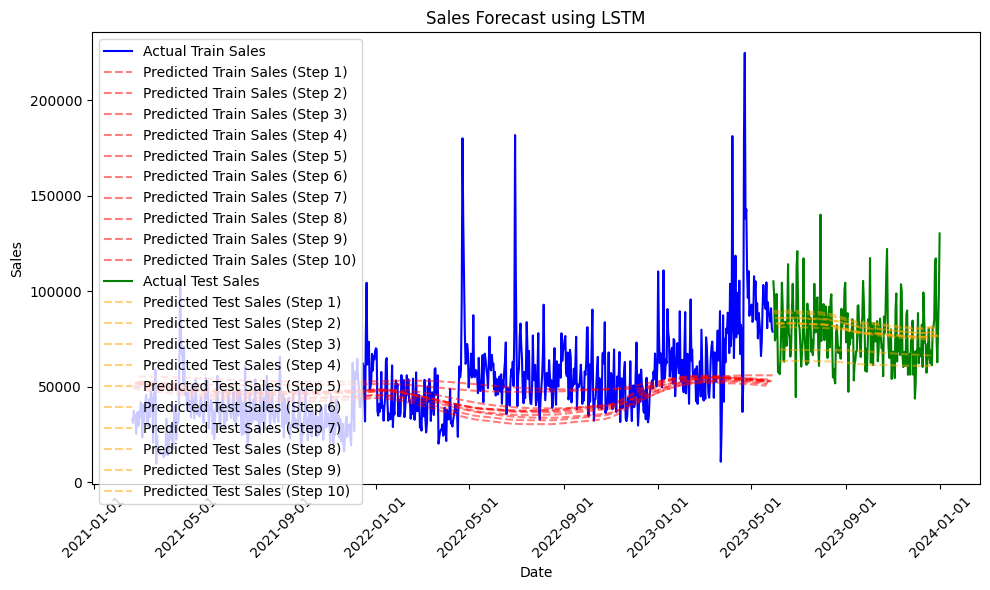

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv", index_col="Date", parse_dates=True)

# Extract sales data and normalize
sales_data = df['Sales'].values.reshape(-1, 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Function to prepare data for LSTM
def prepare_data(data, time_steps, lookback):
    X, y = [], []
    for i in range(len(data) - time_steps - lookback + 1):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps:i + time_steps + lookback, 0])
    return np.array(X), np.array(y)

# Time steps and lookback settings
time_steps = 50  # Number of days to consider in each sample
lookback = 10  # Number of days to predict

# Prepare data
X, y = prepare_data(scaled_data, time_steps, lookback)

# Reshape data for LSTM input
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Building the LSTM model
model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(time_steps, 1)),
    Dropout(0.2),
    LSTM(units=32, return_sequences=False),
    Dropout(0.2),
    Dense(units=lookback)
])

# Compile the model
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and actual data
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, lookback)).reshape(-1)
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, lookback)).reshape(-1)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, lookback)).reshape(-1)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, lookback)).reshape(-1)

# Evaluate the model
train_mse = mean_squared_error(y_train_original, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_original, train_predictions)
train_r2 = r2_score(y_train_original, train_predictions)

test_mse = mean_squared_error(y_test_original, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_original, test_predictions)
test_r2 = r2_score(y_test_original, test_predictions)

# Print evaluation metrics
print("\nTraining Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"R-squared (R²): {train_r2:.2f}")

print("\nTest Set Metrics:")
print(f"Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"R-squared (R²): {test_r2:.2f}")

# Plotting results
plt.figure(figsize=(10, 6))

# Plot actual train sales
plt.plot(df.index[time_steps:train_size + time_steps], df['Sales'].values[time_steps:train_size + time_steps], label='Actual Train Sales', color='blue')

# Plotting train predictions for each lookback step
for i in range(lookback):
    # Adjust the index for train predictions
    train_pred_idx = df.index[time_steps+i:train_size + time_steps:lookback]
    train_pred_data = train_predictions[i::lookback][:len(train_pred_idx)]
    
    # Plot the train predictions
    plt.plot(train_pred_idx, train_pred_data, label=f'Predicted Train Sales (Step {i + 1})', color='red', linestyle='--', alpha=0.5)

# Plot actual test sales
plt.plot(df.index[train_size + time_steps:], df['Sales'].values[train_size + time_steps:], label='Actual Test Sales', color='green')

# Plotting test predictions for each lookback step
for i in range(lookback):
    # Adjust the index for test predictions
    test_pred_idx = df.index[train_size + time_steps+i::lookback]
    test_pred_data = test_predictions[i::lookback][:len(test_pred_idx)]
    
    # Plot the test predictions
    plt.plot(test_pred_idx, test_pred_data, label=f'Predicted Test Sales (Step {i + 1})', color='orange', linestyle='--', alpha=0.5)

# Add titles, labels, and other plot settings
plt.title('Sales Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save the trained model
model.save('lstm_sales_model.keras')

In [ ]:
# fiya lstm code

Epoch 1/100
12/12 [==============================] - 4s 85ms/step - loss: 3.4934e-05 - val_loss: 1.1881e-05
Epoch 2/100
12/12 [==============================] - 0s 21ms/step - loss: 6.0859e-06 - val_loss: 5.0686e-06
Epoch 3/100
12/12 [==============================] - 0s 21ms/step - loss: 2.0965e-06 - val_loss: 5.7780e-08
Epoch 4/100
12/12 [==============================] - 0s 21ms/step - loss: 5.3190e-07 - val_loss: 3.7214e-07
Epoch 5/100
12/12 [==============================] - 0s 21ms/step - loss: 2.0438e-07 - val_loss: 8.8713e-08
Epoch 6/100
12/12 [==============================] - 0s 21ms/step - loss: 1.0136e-07 - val_loss: 5.6797e-08
Epoch 7/100
12/12 [==============================] - 0s 21ms/step - loss: 6.1029e-08 - val_loss: 7.1925e-08
Epoch 8/100
12/12 [==============================] - 0s 21ms/step - loss: 5.9903e-08 - val_loss: 5.2822e-08
Epoch 9/100
12/12 [==============================] - 0s 21ms/step - loss: 4.7106e-08 - val_loss: 4.9524e-08
Epoch 10/100
12/12 [========

ValueError: x and y must have same first dimension, but have shapes (1071,) and (178,)

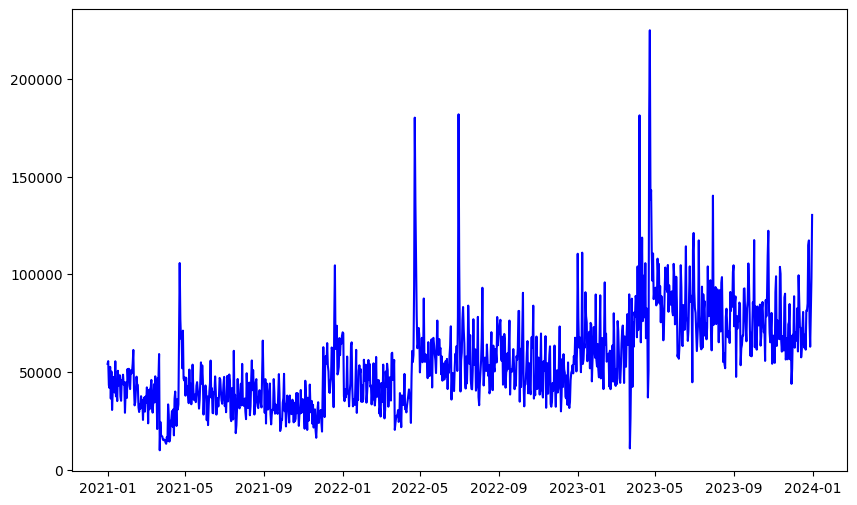

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import TimeSeriesSplit

# Load the data with a date column
df = pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv", index_col='Date', parse_dates=True)

# Extract the sales data
sales_data = df['Sales'].values.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(sales_data)

# Function to prepare data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Setting time steps for LSTM
time_steps = 25  # Try with a smaller time step size for optimization

# Prepare the data
X, y = prepare_data(scaled_data, time_steps)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data using TimeSeriesSplit for K-fold cross-validation
tss = TimeSeriesSplit(n_splits=5)

# Initialize lists to hold the metrics for each fold
mae_list = []
mse_list = []
rmse_list = []
mape_list = []
r_squared_list = []

# K-fold cross-validation
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Building the LSTM model
    model = Sequential()
    model.add(LSTM(units=25, return_sequences=True, input_shape=(time_steps, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=25))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Training the model with EarlyStopping callback
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Making predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Transforming predictions back to original scale
    train_predictions = scaler.inverse_transform(train_predictions)
    test_predictions = scaler.inverse_transform(test_predictions)
    y_test_inverse = scaler.inverse_transform(y_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test_inverse, test_predictions)
    mse = mean_squared_error(y_test_inverse, test_predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test_inverse, test_predictions)
    r_squared = r2_score(y_test_inverse, test_predictions)

    # Append metrics to lists
    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mape_list.append(mape)
    r_squared_list.append(r_squared)

# Calculate average metrics across all folds
print(f"Mean Absolute Error (MAE): {np.mean(mae_list):.2f}")
print(f"Mean Squared Error (MSE): {np.mean(mse_list):.2f}")
print(f"Root Mean Squared Error (RMSE): {np.mean(rmse_list):.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {np.mean(mape_list):.2%}")
print(f"R-squared (R²): {np.mean(r_squared_list):.2f}")

# Plotting results
plt.figure(figsize=(10, 6))

# Plotting actual sales data
plt.plot(df.index, sales_data, label='Actual Sales', color='blue')

# Plotting predicted sales data for each fold
plt.plot(df.index[time_steps:], test_predictions.flatten(), label='Predicted Sales', color='orange')

plt.title('Sales Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d')) # Format x-axis labels as dates
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent overlapping labels
plt.show()

# Save the trained model (from the last fold)
model.save('lstm_sales_model.keras')


Epoch 1/150
27/27 [==============================] - 5s 70ms/step - loss: 2.2287e-04 - val_loss: 5.2213
Epoch 2/150
27/27 [==============================] - 1s 41ms/step - loss: 1.1115e-04 - val_loss: 5.2211
Epoch 3/150
27/27 [==============================] - 1s 42ms/step - loss: 9.0797e-05 - val_loss: 5.2188
Epoch 4/150
27/27 [==============================] - 1s 41ms/step - loss: 8.6707e-05 - val_loss: 5.2198
Epoch 5/150
27/27 [==============================] - 1s 41ms/step - loss: 8.7613e-05 - val_loss: 5.2189
Epoch 6/150
27/27 [==============================] - 1s 40ms/step - loss: 8.9334e-05 - val_loss: 5.2182
Epoch 7/150
27/27 [==============================] - 1s 40ms/step - loss: 8.4327e-05 - val_loss: 5.2183
Epoch 8/150
27/27 [==============================] - 1s 39ms/step - loss: 9.0531e-05 - val_loss: 5.2188
Epoch 9/150
27/27 [==============================] - 1s 41ms/step - loss: 8.4061e-05 - val_loss: 5.2185
Epoch 10/150
27/27 [==============================] - 1s 41ms/st

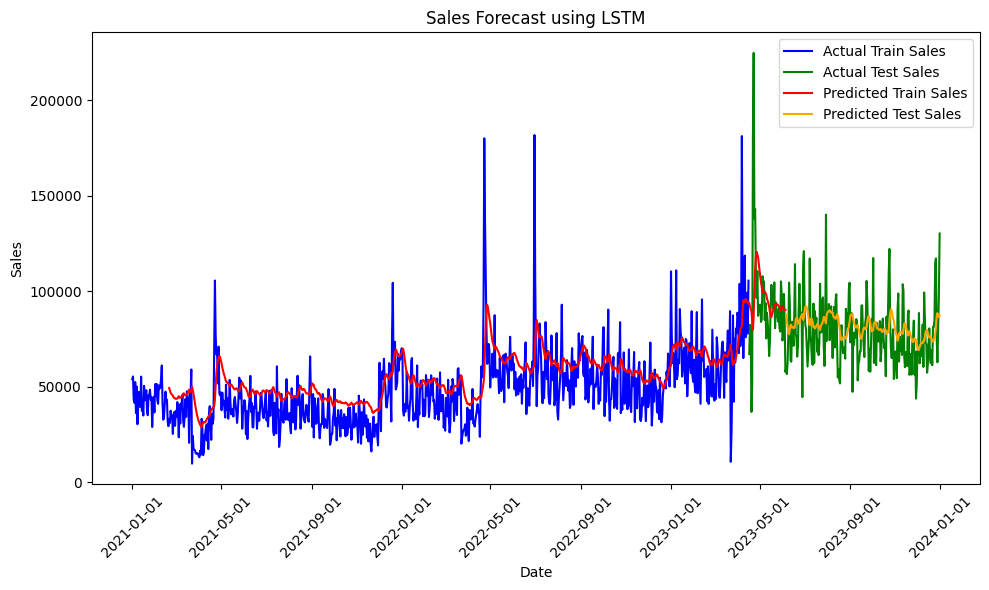

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the data with a date column
df = pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv", index_col='Date', parse_dates=True)

# Extract the sales data
sales_data = df['Sales'].values.reshape(-1, 1)

# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Function to prepare data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Setting time steps for LSTM
time_steps = 50

# Prepare the data
X, y = prepare_data(scaled_data, time_steps)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting the data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training the model with EarlyStopping callback
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Making predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Transforming predictions back to original scale
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

# Plotting results
plt.figure(figsize=(10, 6))

# Plotting training data
plt.plot(df.index[:train_size], sales_data[:train_size], label='Actual Train Sales', color='blue')

# Plotting testing data
plt.plot(df.index[train_size:], sales_data[train_size:], label='Actual Test Sales', color='green')

# Plotting predictions
plt.plot(df.index[time_steps:(train_size + time_steps)], train_predictions, label='Predicted Train Sales', color='red')
plt.plot(df.index[(train_size + time_steps):], test_predictions, label='Predicted Test Sales', color='orange')

plt.title('Sales Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Format x-axis labels as dates
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()
# Save the trained model
model.save("sales_forecast_model.h5")

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Load the data with a date column
df = pd.read_csv("C:/Users/Carolin/Desktop/3yeardata.csv", index_col='Date', parse_dates=True)

# Extract the sales data
sales_data = df['Sales'].values.reshape(-1, 1)

# Normalize the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales_data)

# Function to prepare data for LSTM
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Setting time steps for LSTM
time_steps = 50

# Load the saved model
saved_model = load_model("sales_forecast_model.h5")

# Function to predict sales for a given date range
def predict_sales(start_date, end_date):
    # Prepare data for prediction
    if end_date <= df.index[-1]:
        start_index = df.index.get_loc(start_date)
        end_index = df.index.get_loc(end_date)
        
        X_pred, _ = prepare_data(scaled_data[start_index:end_index+1], time_steps)
        X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[1], 1)
    else:
        # Extend the range to include future dates
        last_date = df.index[-1]
        extended_dates = pd.date_range(last_date, periods=len(df)+1, freq='D')
        extended_scaled_data = np.concatenate((scaled_data, np.zeros((len(extended_dates) - len(df), 1))))
        
        X_pred, _ = prepare_data(extended_scaled_data[-len(extended_dates):], time_steps)
        X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[1], 1)

    # Make predictions
    predictions = saved_model.predict(X_pred)

    # Transform predictions back to original scale
    predictions = scaler.inverse_transform(predictions)

    # Return predicted sales along with date range
    return pd.DataFrame(data=predictions.flatten(), index=pd.date_range(start=start_date, periods=len(predictions), freq='D'), columns=['Predicted Sales'])

# Prompt the user to input the start date and end date
start_date = pd.to_datetime(input("Enter the start date (YYYY-MM-DD): "))
end_date = pd.to_datetime(input("Enter the end date (YYYY-MM-DD): "))

# Predict sales for the specified date range
predicted_sales = predict_sales(start_date, end_date)

# Print the numerical output
print("Predicted Sales:")
print(predicted_sales)

# Plotting results
plt.figure(figsize=(10, 6))

# Plotting actual sales
plt.plot(df.index, sales_data, label='Actual Sales', color='blue')

# Plotting predicted sales
plt.plot(predicted_sales.index, predicted_sales.values, label='Predicted Sales', color='red')

plt.title('Sales Forecast using LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  # Format x-axis labels as dates
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


Enter the start date (YYYY-MM-DD):  2024-05-01
Enter the end date (YYYY-MM-DD):  2024-08-01


ValueError: Neither `start` nor `end` can be NaT